# Advanced Gargantext Tutorial (Python)

In [1]:
import sys
sys.path.insert(0, '/srv/gargantext')

In [2]:
# First import the library Gargantext Notebook
from gargantext_notebook import *

# This enables to draw graphics later
%matplotlib inline  

In [5]:
#project = myProject_fromUrl("http://imt.gargantext.org/projects/300535")
project = myProject_fromUrl("http://localhost:8000/projects/2")
corpus  = newCorpus(project, source="hal", name="Machine learning", query="LSTM")

105
LSTM 1000
CORPUS #17058
PARSING
Loading available PARSERS:
	- EuropresseParser
	- RISParser
	- PubmedParser
	- RISParser
	- ISIParser
	- RISParser
	- CSVParser
	- ISTexParser
	- CernParser
	- MultivacParser
	- HalParser
	- IsidoreParser
0 docs skipped
105 parsed
#MAIN language of the CORPUS __unknown__
CORPUS #17058: parsed 105
INTEGRATE
INTEGRATE
CORPUS #17058: extracted ngrams
CORPUS #17058: indexed hyperdata
CORPUS #17058: [2017-08-11_11:21:18] new favorites node #17164
CORPUS #17058: [2017-08-11_11:21:18] starting ngram lists computation
CORPUS #17058: [2017-08-11_11:21:18] new stoplist node #17165
# STEMMERS LOADED {'__unknown__': <nltk.stem.snowball.SnowballStemmer object at 0x7fb811588e48>}
#SUPPORTED STEMMERS LANGS []
CORPUS #17058: [2017-08-11_11:21:20] new grouplist node #17166
CORPUS #17058: [2017-08-11_11:21:20] new occs node #17167
compute_ti_ranking
2017-08-11_11:21:20 : Starting Query tf_nd_query
2017-08-11_11:21:21 : End Query tf_nd_quer
2017-08-11_11:21:21 : tfidfs

In [ ]:
session.query(Node.hyperdata[""])

In [ ]:
for doc in new_docs:
    new_doc = (Node( user_id   = project.user_id
                   , parent_id = corpus.id
                   , typename= 'DOCUMENT'
                   , name=doc["title"][:50]
                   , hyperdata=doc)
              )
    session.add(new_doc)
session.commit()

In [4]:
# Copier/coller l'url du corpus (avec http://): sur lequel travailler
corpus_url = "http://gargantext.org/projects/251737/corpora/254749"

corpus_id = corpus_url.split("/")[6]

print("L\'identifiant du corpus est : %s" % corpus_id)

L'identifiant du corpus est : 254749


In [5]:
# To get all the documents:
docs = documents(corpus_id)

In [6]:
# To get the title of the first document 
# [0] indicates the index of the first document
docs[0].hyperdata['title']

'Towards big data science in the decade ahead from ten years of InCoB and the 1st ISCB-Asia Joint Conference.'

In [7]:
# To get the abstract of the first document (0)
docs[0].hyperdata['abstract']

"The 2011 International Conference on Bioinformatics (InCoB) conference, which is the annual scientific conference of the Asia-Pacific Bioinformatics Network (APBioNet), is hosted by Kuala Lumpur, Malaysia, is co-organized with the first ISCB-Asia conference of the International Society for Computational Biology (ISCB). InCoB and the sequencing of the human genome are both celebrating their tenth anniversaries and InCoB's goalposts for the next decade, implementing standards in bioinformatics and globally distributed computational networks, will be discussed and adopted at this conference. Of the 49 manuscripts (selected from 104 submissions) accepted to BMC Genomics and BMC Bioinformatics conference supplements, 24 are featured in this issue, covering software tools, genome/proteome analysis, systems biology (networks, pathways, bioimaging) and drug discovery and design."

In [8]:
# To get the authors of the first document (0)
docs[0].hyperdata['authors']

'Shoba Ranganathan, Christian Schönbach, Janet Kelso, Burkhard Rost, Sheila Nathan, Tin Wee Tan'

In [9]:
# To get the source of the first document (0)
docs[0].hyperdata['source']

'BMC bioinformatics'

In [10]:
# If I want to count:
myChart = chart(docs, "publication_year")

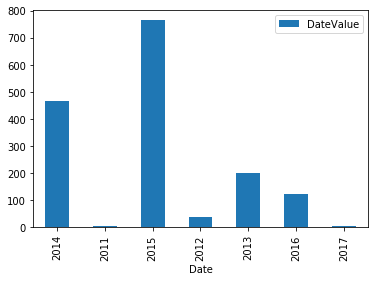

In [11]:
myChart.plot.bar()

## Title

Here I can add some comments on the cart.
1. First point
2. Second point

# Lang Cleaning tools

In [ ]:
detect_lang("Ceci est une phrase en français.")

In [ ]:
detect_lang("This is an english sentence.")

In [ ]:
chart(docs, "language_iso2").plot.bar()

In [14]:
Counter([doc.hyperdata["language_iso2"] for doc in docs])

Counter({'de': 13,
         'en': 1547,
         'es': 5,
         'fi': 1,
         'fr': 4,
         'hu': 1,
         'it': 1,
         'ja': 5,
         'ko': 1,
         'ru': 3,
         'zh': 23})

In [12]:
# Deleting language that is not in majority
def cleanCorpusWithLang(corpus_id, lang):
    return (session.query(Node.id).filter(Node.parent_id == corpus_id)
                        .filter(Node.hyperdata["language_iso2"].astext != lang)
                        .count()
                       #.delete()
           )

In [13]:
cleanCorpusWithLang(corpus_id, 'en')

57

In [15]:
abstract0 = """"Ceci est un paragraphe en français.

This is an english paragraph.
 """

abstract1 = """"This is an english paragraph.

This is an english paragraph.
 """

def clean_lang_inText(lang, text):
    
    texts_before = nltk.tokenize.blankline_tokenize(text)
    texts_after  = '\n\n'.join([sentence 
                                    for sentence in texts_before
                                    if detect_lang(sentence) == lang
                              ])
    
    return (len(texts_before) != len(nltk.tokenize.blankline_tokenize(texts_after)), texts_after)

[clean_lang_inText('en', abstract) for abstract in [abstract0, abstract1]]

# TODO update each document accordingly

[(True, 'This is an english paragraph.\n '),
 (False, '"This is an english paragraph.\n\nThis is an english paragraph.\n ')]

In [ ]:
# TODO update all the abstract with That function

# Measures IMT Tools

In [16]:
scan_hal("machine learning AND deep")

ConnectionError: HTTPSConnectionPool(host='api.archives-ouvertes.fr', port=443): Max retries exceeded with url: /search?wt=json&q=machine+learning+AND+deep&fl=+title_s%0A+++++++++++++++%2C+abstract_s%0A+++++++++++++++%2C+submittedDate_s%0A+++++++++++++++%2C+journalDate_s%0A+++++++++++++++%2C+authFullName_s%0A+++++++++++++++%2C+uri_s%0A+++++++++++++++%2C+isbn_s%0A+++++++++++++++%2C+issue_s%0A+++++++++++++++%2C+docType_s%0A+++++++++++++++%2C+journalPublisher_s%0A+++++++++++++&start=1&rows=10 (Caused by NewConnectionError('<requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x7f48069d1f98>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',))

In [ ]:
# Request syntax
# "network analysis"     = network <-> analysis
# "network OR analysis"  = network | analysis
# "network AND analysis" = network & analysis

scan_gargantext(corpus_id, 'english', "machine | learning & deep")

# "network NOT analysis" = @@ to_tsquery('network') !! to_tsquery('analysis')
# (need to change the function if not has to be used)

In [ ]:
# Forces / Faiblesses de l'IMT
#             Hal Query                     Gargantext Query
queries = [ ("network analysis"         , "network <-> analysis" )
          , ("big data AND something"   , "(big <-> data) & something")
           ]
[(query[0], query[1]) for query in queries]

In [ ]:
def imt_vs_hal(corpus_id, queryHal, queryGarg):
    return((scan_gargantext(corpus_id, 'english', queryGarg),        scan_hal(queryHal)))
    #return((scan_gargantext(corpus_id, 'english', queryGarg) *100 / scan_hal(queryHal)))

In [ ]:
# Then chart it to see your strenght and weakness!
[imt_vs_hal(corpus_id, query[0], query[1]) for query in queries]


# Graph generation

In [ ]:
# TODO Cooccurrences optimization

In [ ]:
# TODO optimize the distributional distance

# List Management

In [ ]:
# Front End add a check box to merge or to overwrite previous list

In [ ]:
# optimize the list merge